In [5]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_from_parquet(file_path):
    """
    Loads a DataFrame from a Parquet file.

    Parameters:
    -----------
    file_path : str
        The path to the Parquet file.

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the data loaded from the Parquet file.
    """
    
    try:
        df = pd.read_parquet(file_path)
        return df
    except Exception as e:
        print(f"Failed to load data from {file_path}. Error: {e}")
        return None
    
complete_data = load_from_parquet('/home/bellijjy/completedataframeallrats')
complete_data

,animal,area,state,day,epoch,time_chunk,tau,branching_factor,data,dt,...,y_position,head_direction,speed,track_segment_id,linear_velocity,labeled_segments,linear_distance,arm_name,linear_position,linear_speed
0,con,CA3,sleep,4,5,31,809.383114,0.998765,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,con,CA3,wake,5,4,26,407.667742,0.997550,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,70.808364,-0.138776,16.452129,2.357778,4.951624,2.584444,72.477983,Center Arm,165.034719,16.581624
2,con,CA3,wake,3,2,4,381.053557,0.997379,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000467,...,54.939719,-0.458237,8.420204,2.746102,5.686217,3.257238,79.921567,Center Arm,154.182676,6.493693
3,con,CA1,sleep,1,5,19,122.227841,0.991852,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
4,con,CA3,sleep,2,1,6,13.013210,0.926033,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,cha,CA1,sleep,4,3,29,6.195645,0.850948,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5231,cha,CA1,wake,2,4,6,112.422062,0.991144,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999967,...,96.150239,-0.438341,0.792830,1.000000,-0.388967,2.000000,32.193149,Center Arm,164.596393,0.739960
5232,cha,CA3,sleep,5,3,10,9.780898,0.902813,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5233,cha,CA1,wake,5,2,29,1142.061000,0.999125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,...,123.282405,-0.004723,10.604992,2.335189,-2.951429,2.064588,96.036485,Left Arm,205.102751,8.648989


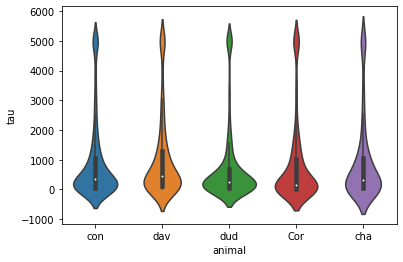

In [6]:
sns.violinplot(x='animal', y='tau', data=complete_data)
plt.show()

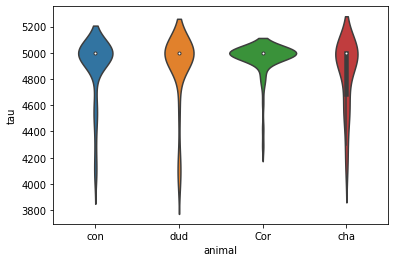

In [20]:
def filter_by_tau_threshold(df, threshold):
    return df[(df['tau'] > threshold) & df['x_position'].notna() & df['y_position'].notna()]

blob_df = filter_by_tau_threshold(complete_data, 4000)
sns.violinplot(x='animal', y='tau', data=blob_df)
plt.show()

In [8]:
data_complete = complete_data[complete_data['x_position'].notna() & complete_data['y_position'].notna()]

In [9]:
data_complete.describe()

,day,epoch,time_chunk,tau,branching_factor,dt,x_position,y_position,head_direction,speed,track_segment_id,linear_velocity,labeled_segments,linear_distance,linear_position,linear_speed
count,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,3.923545,3.584709,15.472198,1067.664928,0.980895,1.000250,136.018777,100.065443,0.193185,8.136078,2.385710,0.069140,2.510248,75.295314,166.470619,7.146734
std,1.465309,1.352799,10.238056,1431.369555,0.038011,0.000229,75.722668,48.323405,0.950130,10.300865,1.066283,3.588765,0.852783,46.984909,39.668442,4.218092
min,1.000000,2.000000,0.000000,5.000000,0.818731,0.999967,25.457382,-220.362792,-3.019298,0.051432,1.000000,-12.424772,0.000000,0.000000,85.335570,0.000000
25%,3.000000,2.000000,7.000000,79.418925,0.987487,1.000000,77.180852,67.079646,-0.414046,5.378776,1.551446,-2.445442,1.797553,37.696173,140.758601,4.129379
50%,4.000000,4.000000,15.000000,508.125663,0.998034,1.000434,107.080366,84.622683,0.143936,7.864034,2.247216,0.000142,2.554444,75.897014,153.426996,6.758161
75%,5.000000,4.000000,23.000000,1301.980460,0.999232,1.000434,162.178426,144.087602,0.851442,10.614440,3.000000,2.420740,3.233315,105.307705,181.174295,9.846975
max,7.000000,6.000000,58.000000,5000.000000,0.999800,1.000467,310.738055,200.637378,2.958857,333.626086,5.000000,12.298053,4.000000,196.173182,334.983397,28.637500


In [10]:
blob_df.describe()

,day,epoch,time_chunk,tau,branching_factor,dt,x_position,y_position,head_direction,speed,track_segment_id,linear_velocity,labeled_segments,linear_distance,linear_position,linear_speed
count,209.000000,209.000000,209.00000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,3.822967,3.540670,15.53110,4905.507723,0.999796,1.000255,135.234289,98.664510,0.118773,7.696106,2.376415,0.002044,2.445703,77.789046,170.858060,7.058541
std,1.428504,1.351467,9.81415,227.723342,0.000011,0.000227,71.534836,47.058707,0.902012,3.258005,1.038219,4.191264,0.822952,46.671930,44.511065,3.793101
min,1.000000,2.000000,0.00000,4030.017862,0.999752,0.999967,33.490443,18.349504,-2.362258,0.146134,1.000000,-11.395402,0.341518,0.000000,91.873733,0.003782
25%,3.000000,2.000000,7.00000,4997.853627,0.999800,1.000000,77.363824,63.451098,-0.463047,5.412008,1.580000,-3.068348,1.755011,40.515656,143.239256,4.512557
50%,4.000000,4.000000,15.00000,4999.999989,0.999800,1.000434,117.110515,85.195097,0.071291,7.601196,2.161111,0.014002,2.508909,76.890858,154.250925,6.621342
75%,5.000000,4.000000,23.00000,5000.000000,0.999800,1.000434,159.921782,140.764692,0.745688,9.580381,2.978865,2.822791,3.130290,106.004571,193.024385,9.068104
max,7.000000,6.000000,48.00000,5000.000000,0.999800,1.000467,309.926284,189.096400,2.465592,15.331971,5.000000,11.526073,4.000000,177.109457,322.940377,23.709889


# Correlation Heatmap for extreme Data of two animals

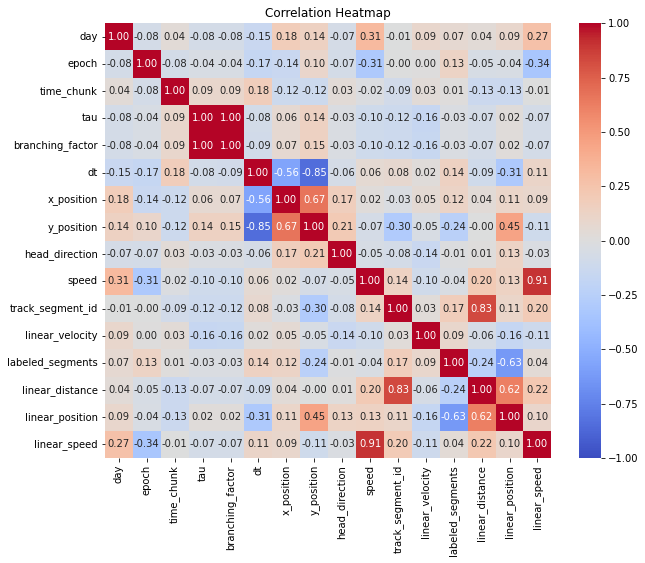

In [11]:
def calculate_numeric_correlation(df):
    # Keeping only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Calculating the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    return correlation_matrix

corr_matrix_blob = calculate_numeric_correlation(blob_df)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_blob, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center= 0)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Heatmap for non-extreme Data of two animals

Before dropping:
Length of non_extreme_data: 2302
Length of blob_df: 209
After dropping:
Length of cha_cor_data_non_blob: 2093
Duplicate indices in cha_cor_data_complete: 0
Duplicate indices in blob_df: 0


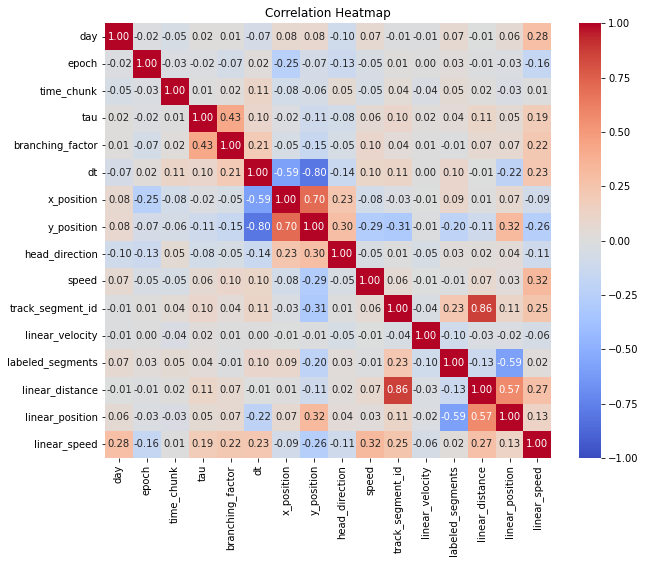

In [12]:
# Set the index for both dataframes
                           
data_complete.set_index(['day', 'epoch', 'time_chunk', 'animal', 'area'], inplace=True)
blob_df.set_index(['day', 'epoch', 'time_chunk', 'animal', 'area'], inplace=True)

# Print lengths before dropping
print("Before dropping:")
print("Length of non_extreme_data:", len(data_complete))
print("Length of blob_df:", len(blob_df))

# Drop the rows
non_extreme_data = data_complete.drop(blob_df.index, errors='ignore')

# Reset the index back to columns
non_extreme_data = non_extreme_data.reset_index()
blob_df = blob_df.reset_index()

# Print lengths after dropping
print("After dropping:")
print("Length of cha_cor_data_non_blob:", len(non_extreme_data))

# Check if there are duplicate indices
print("Duplicate indices in cha_cor_data_complete:", non_extreme_data.index.duplicated().sum())
print("Duplicate indices in blob_df:", blob_df.index.duplicated().sum())

corr_matrix_comp = calculate_numeric_correlation(non_extreme_data)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_comp, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center= 0)
plt.title("Correlation Heatmap")
plt.show()

# Difference in Correlation Heatmap between non-extreme and extreme values for two animals

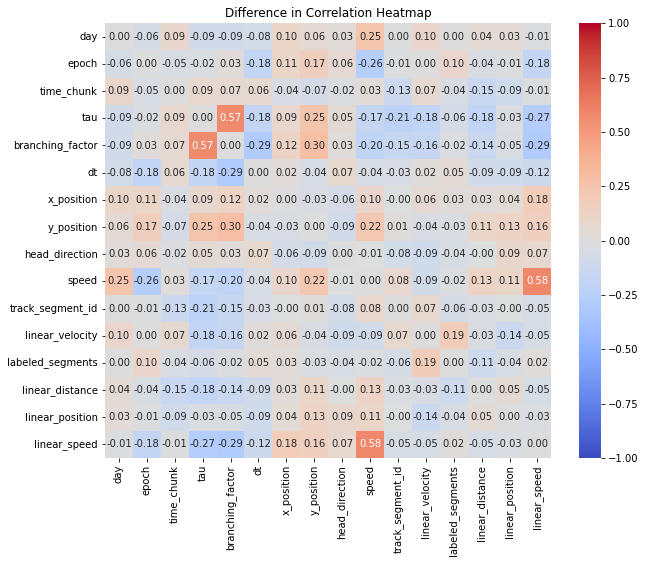

In [13]:
# Subtracting the correlation matrices
difference_corr_matrix = corr_matrix_blob - corr_matrix_comp

# Visualizing the difference in correlations
plt.figure(figsize=(10, 8))
sns.heatmap(difference_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Difference in Correlation Heatmap")
plt.show()

# Bootstrapping the extreme data and and using the zou-statistic on the difference matrix to identify extreme values

In [15]:
# Update the bootstrap_correlation function to avoid using pd.Panel
def bootstrap_correlation(df, n_bootstrap=1000):
    """Perform bootstrapping to generate a distribution of correlation matrices."""
    bootstrap_corr_matrices = []
    
    for _ in range(n_bootstrap):
        # Sampling with replacement
        sample_df = df.sample(n=len(df), replace=True)
        
        # Python code to filter only numeric columns from a DataFrame for correlation calculation
        sample_df = sample_df.select_dtypes(include=['number'])

        # Calculate correlation matrix for the sample
        corr_matrix = sample_df.corr()
        bootstrap_corr_matrices.append(corr_matrix)
        
    # Averaging the bootstrapped correlation matrices
    avg_bootstrap_corr = sum(bootstrap_corr_matrices) / n_bootstrap
    
    return avg_bootstrap_corr

# Re-run the analysis
# Bootstrap the smaller sample to get average correlation matrix
avg_bootstrap_corr = bootstrap_correlation(blob_df, n_bootstrap=1000)

# Perform Fisher's Z-Transformation to compare correlation matrices
results = {}
for col1 in avg_bootstrap_corr.columns:
    for col2 in avg_bootstrap_corr.columns:
        if col1 != col2:
            r1 = avg_bootstrap_corr.loc[col1, col2]
            r2 = corr_matrix_comp.loc[col1, col2]
            
            # Use Zou's method for comparing correlations
            z_score, p_value = compare_correlations_zou(r1, r2, len(blob_df), len(non_extreme_data))
            
            results[(col1, col2)] = {'Z-Score': z_score, 'P-Value': p_value}

# Displaying results
results_df = pd.DataFrame(results).T

In [18]:
# Set the display option to show all rows without truncation
pd.set_option('display.max_rows', None)

print('These are the differences in corr coeffs between extreme and non-extreme data')
# Display the filtered DataFrame
print(results_df[results_df['P-Value'] < 0.05])

# Reset the display option to its default value (optional)
pd.reset_option('display.max_rows')


These are the differences in corr coeffs between extreme and non-extreme data
                                     Z-Score   P-Value
day              speed              4.087821  0.000044
epoch            dt                -2.988250  0.002806
                 y_position         2.730154  0.006330
                 speed             -4.431155  0.000009
                 linear_speed      -3.047851  0.002305
time_chunk       track_segment_id  -2.132840  0.032938
                 linear_distance   -2.429917  0.015102
tau              branching_factor  52.443144  0.000000
                 dt                -2.864106  0.004182
                 y_position         4.045080  0.000052
                 speed             -2.643737  0.008200
                 track_segment_id  -3.412978  0.000643
                 linear_velocity   -2.946369  0.003215
                 linear_distance   -2.881045  0.003964
                 linear_speed      -4.342116  0.000014
branching_factor tau               52.4431

In [14]:
from scipy.stats import norm

def compare_correlations_zou(r1, r2, n1, n2):
    """
    Compare two independent correlation coefficients using Zou's method.
    
    Parameters:
    -----------
    r1, r2 : float
        The correlation coefficients to compare.
    n1, n2 : int
        The sample sizes for the two correlations.
        
    Returns:
    --------
    z_score : float
        The Z-score for the comparison.
    p_value : float
        The two-tailed p-value.
    """
    
    # Fisher's Z-transform for each correlation
    z1 = 0.5 * (np.log(1 + r1) - np.log(1 - r1))
    z2 = 0.5 * (np.log(1 + r2) - np.log(1 - r2))
    
    # Standard errors
    se1 = 1 / np.sqrt(n1 - 3)
    se2 = 1 / np.sqrt(n2 - 3)
    
    # Zou's method
    se_diff = np.sqrt(se1**2 + se2**2 - 2 * 0.5 * se1 * se2)
    z_score = (z1 - z2) / se_diff
    
    # Two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    return z_score, p_value


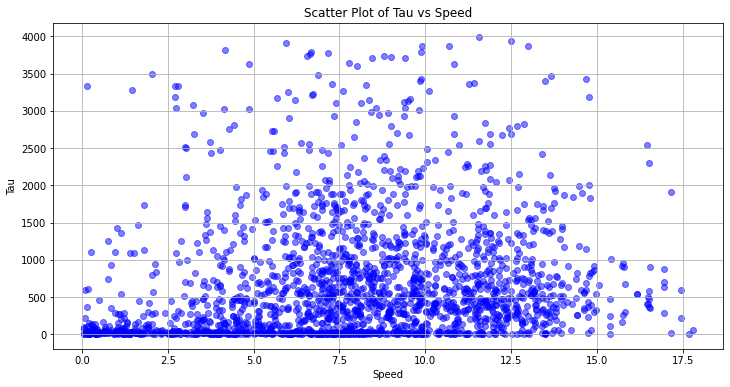

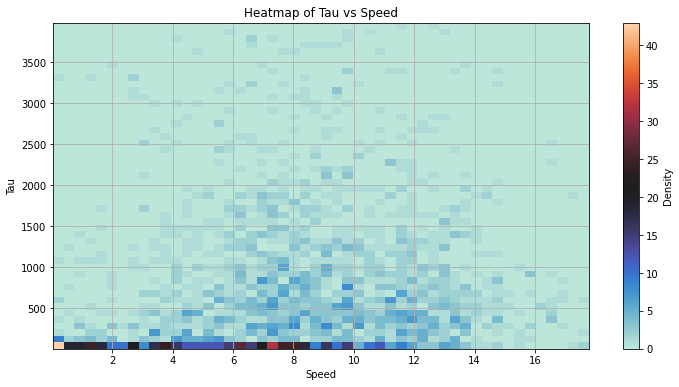

In [117]:
from scipy.stats import zscore

non_extreme_data = non_extreme_data[np.abs(zscore(non_extreme_data['speed'])) < 5]

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(non_extreme_data['speed'], non_extreme_data['tau'], c='blue', alpha=0.5, label='Data points')
plt.xlabel('Speed')
plt.ylabel('Tau')
plt.title('Scatter Plot of Tau vs Speed')
plt.grid(True)
plt.show()

# Drop rows where either 'speed' or 'tau' is NaN or infinite
filtered_data = non_extreme_data.dropna(subset=['speed', 'tau'])
filtered_data = filtered_data[np.isfinite(filtered_data['speed']) & np.isfinite(filtered_data['tau'])]

# Now filtered_data only contains rows where both 'speed' and 'tau' are finite
heatmap, xedges, yedges = np.histogram2d(filtered_data['speed'], filtered_data['tau'], bins=(50, 50))

# Normalize the heatmap
heatmap_norm = heatmap / np.max(heatmap)

# Plotting
plt.figure(figsize=(12, 6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='icefire', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel('Speed')
plt.ylabel('Tau')
plt.title('Heatmap of Tau vs Speed')
plt.grid(True)
plt.show()


In [ ]:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(non_extreme_data['linear_distance'], non_extreme_data['tau'], c='blue', alpha=0.5, label='Data points')
plt.xlabel('linear_distance')
plt.ylabel('Tau')
plt.title('Scatter Plot of Tau vs linear_distance')
plt.grid(True)
plt.show()

# Drop rows where either 'speed' or 'tau' is NaN or infinite
filtered_data = non_extreme_data.dropna(subset=['linear_distance', 'tau'])
filtered_data = filtered_data[np.isfinite(filtered_data['linear_distance']) & np.isfinite(filtered_data['tau'])]

# Now filtered_data only contains rows where both 'speed' and 'tau' are finite
heatmap, xedges, yedges = np.histogram2d(filtered_data['linear_distance'], filtered_data['tau'], bins=(50, 50))

# Normalize the heatmap
heatmap_norm = heatmap / np.max(heatmap)

# Plotting
plt.figure(figsize=(12, 6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='icefire', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel('linear_distance')
plt.ylabel('Tau')
plt.title('Heatmap of Tau vs linear_distance')
plt.grid(True)
plt.show()


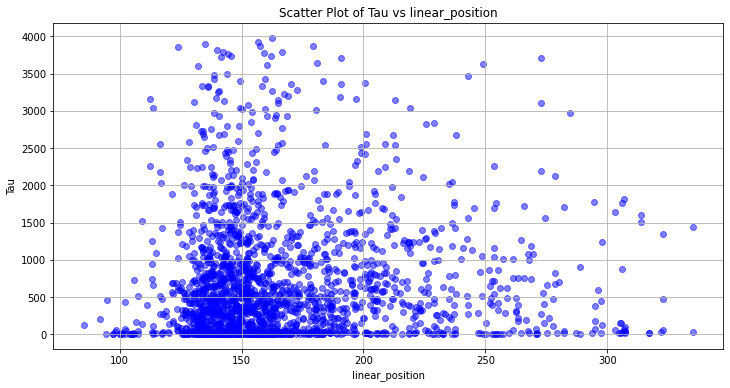

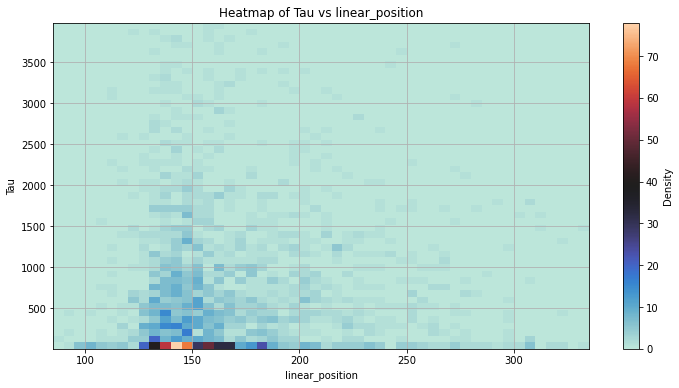

In [13]:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(non_extreme_data['linear_position'], non_extreme_data['tau'], c='blue', alpha=0.5, label='Data points')
plt.xlabel('linear_position')
plt.ylabel('Tau')
plt.title('Scatter Plot of Tau vs linear_position')
plt.grid(True)
plt.show()

# Drop rows where either 'speed' or 'tau' is NaN or infinite
filtered_data = non_extreme_data.dropna(subset=['linear_position', 'tau'])
filtered_data = filtered_data[np.isfinite(filtered_data['linear_position']) & np.isfinite(filtered_data['tau'])]

# Now filtered_data only contains rows where both 'speed' and 'tau' are finite
heatmap, xedges, yedges = np.histogram2d(filtered_data['linear_position'], filtered_data['tau'], bins=(50, 50))

# Normalize the heatmap
heatmap_norm = heatmap / np.max(heatmap)

# Plotting
plt.figure(figsize=(12, 6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='icefire', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel('linear_position')
plt.ylabel('Tau')
plt.title('Heatmap of Tau vs linear_position')
plt.grid(True)

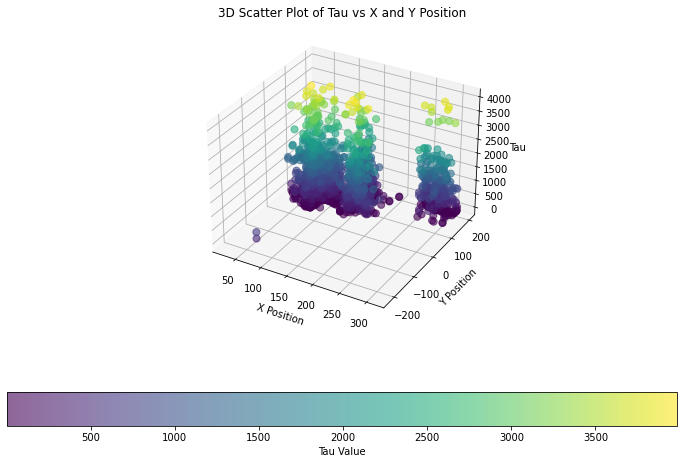

In [14]:
# Let's try plotting the 3D scatter plot again
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
sc = ax.scatter(filtered_data['x_position'], filtered_data['y_position'], filtered_data['tau'], c=filtered_data['tau'] , cmap='viridis', s=50, alpha=0.6)
plt.colorbar(sc, label='Tau Value', orientation='horizontal')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Tau')
ax.set_title('3D Scatter Plot of Tau vs X and Y Position')

plt.show()


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def logistic_regression_with_downsampling(df, predictor_cols, tau_threshold):
    """
    This function takes a dataframe, labels tau values as extreme or non-extreme based on a threshold,
    performs one-hot encoding if necessary, and then runs logistic regression.
    
    Parameters:
        - df: DataFrame containing predictor and response variables
        - predictor_cols: List of column names to be used as predictors in logistic regression
        - tau_threshold: Threshold for labeling tau as extreme
    
    Returns:
        - Classification report and confusion matrix
    """
    
    df_copy = df.copy() 
    
    # Label 'tau' values as "extreme" or "non_extreme" based on tau_threshold
    df_copy['tau_category'] = np.where(df_copy['tau'] > tau_threshold, 'extreme', 'non_extreme')
    
    # Count the number of 'extreme' and 'non_extreme' rows
    num_extreme = df_copy[df_copy['tau_category'] == 'extreme'].shape[0]
    num_non_extreme = df_copy[df_copy['tau_category'] == 'non_extreme'].shape[0]

    # Downsample the 'non_extreme' rows to match the number of 'extreme' rows
    if num_non_extreme > num_extreme:
        df_non_extreme_downsampled = df_copy[df_copy['tau_category'] == 'non_extreme'].sample(n=num_extreme)
        df_extreme = df_copy[df_copy['tau_category'] == 'extreme']
        df_copy = pd.concat([df_non_extreme_downsampled, df_extreme])

    # Check if any of the predictor_cols are in the index and reset the index if necessary
    index_cols = set(df_copy.index.names) & set(predictor_cols)
    if index_cols:
        df_copy.reset_index(inplace=True)
    
    # Identify categorical columns and one-hot encode them
    categorical_cols = df_copy[predictor_cols].select_dtypes(include=['object']).columns.tolist()
    df_copy = pd.get_dummies(df_copy, columns=categorical_cols)
    
    # Update predictor_cols to include the newly created columns
    new_predictor_cols = [col for col in df_copy.columns if any(cat_col in col for cat_col in categorical_cols)]
    predictor_cols = [col for col in predictor_cols if col not in categorical_cols]  # Remove old categorical predictors
    predictor_cols.extend(new_predictor_cols)  # Add new one-hot encoded columns
    
    # Split the data into training and test sets
    X = df_copy[predictor_cols]
    y = df_copy['tau_category']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and fit the logistic regression model
    log_reg = LogisticRegression(max_iter=1000, solver='sag')  
    log_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test_scaled)
    
    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return conf_matrix, class_report, y_test, y_pred

# Example usage (assuming `data_complete` is your DataFrame and 'area', 'state', 'animal', etc. are your predictor columns)
conf_matrix, class_report, y_test, y_pred = logistic_regression_with_downsampling(data_complete, predictor_cols=['linear_distance', 'x_position', 'y_position', 'linear_position', 'speed', 'area', 'animal', 'day', 'epoch'], tau_threshold=4000)
print("Confusion Matrix:", conf_matrix)
print("Classification Report:", class_report)


Confusion Matrix: [[27 15]
 [19 23]]
Classification Report:               precision    recall  f1-score   support

     extreme       0.59      0.64      0.61        42
 non_extreme       0.61      0.55      0.57        42

    accuracy                           0.60        84
   macro avg       0.60      0.60      0.59        84
weighted avg       0.60      0.60      0.59        84



/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [91]:
nan_positions = complete_data[complete_data['x_position'].isna()][['day', 'epoch', 'time_chunk']]

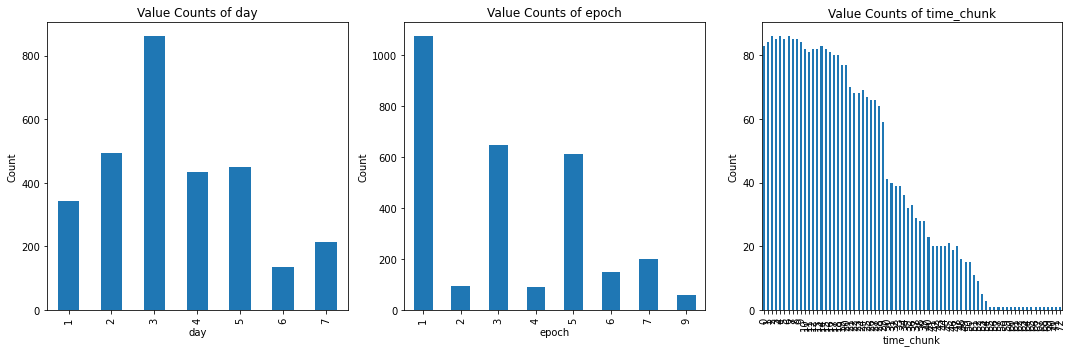

In [111]:
import matplotlib.pyplot as plt

def plot_count_of_values(df, columns=['day', 'epoch', 'time_chunk']):
    """
    Plots the frequency of each unique value in the specified columns of the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the columns to plot.
    columns (list): List of column names to plot.

    Returns:
    None: Displays the plot.
    """
    fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))
    for ax, col in zip(axes, columns):
        value_counts = df[col].value_counts().sort_index()
        value_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Value Counts of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()



plot_count_of_values(nan_positions)


In [ ]:
# The rows with NaN seem to be either from the sleep epoch (1,3,5,7) or randomly caused.

In [109]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

def svm_with_downsampling(df, predictor_cols, tau_threshold):
    """
    This function takes a dataframe, labels tau values as extreme or non-extreme based on a threshold,
    performs one-hot encoding if necessary, and then runs Support Vector Machine (SVM).
    
    Parameters:
        - df: DataFrame containing predictor and response variables
        - predictor_cols: List of column names to be used as predictors in SVM
        - tau_threshold: Threshold for labeling tau as extreme
    
    Returns:
        - Classification report and confusion matrix
    """
    df_copy = df.copy()
    
    # Label 'tau' values as "extreme" or "non_extreme" based on tau_threshold
    df_copy['tau_category'] = np.where(df_copy['tau'] > tau_threshold, 'extreme', 'non_extreme')
    
    # Count the number of 'extreme' and 'non_extreme' rows
    num_extreme = df_copy[df_copy['tau_category'] == 'extreme'].shape[0]
    num_non_extreme = df_copy[df_copy['tau_category'] == 'non_extreme'].shape[0]

    # Downsample the 'non_extreme' rows to match the number of 'extreme' rows
    if num_non_extreme > num_extreme:
        df_non_extreme_downsampled = df_copy[df_copy['tau_category'] == 'non_extreme'].sample(n=num_extreme)
        df_extreme = df_copy[df_copy['tau_category'] == 'extreme']
        df_copy = pd.concat([df_non_extreme_downsampled, df_extreme])
        
    # Identify categorical columns and one-hot encode them
    categorical_cols = df_copy[predictor_cols].select_dtypes(include=['object']).columns.tolist()
    df_copy = pd.get_dummies(df_copy, columns=categorical_cols)
    
    # Update predictor_cols to include the newly created columns
    new_predictor_cols = [col for col in df_copy.columns if any(cat_col in col for cat_col in categorical_cols)]
    predictor_cols = [col for col in predictor_cols if col not in categorical_cols]  # Remove old categorical predictors
    predictor_cols.extend(new_predictor_cols)  # Add new one-hot encoded columns
    
    # Prepare the features and labels
    X = df_copy[predictor_cols]
    y = df_copy['tau_category']
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardizing the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and fit the SVM model
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = svm_model.predict(X_test)
    
    # Compute the classification report and confusion matrix
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    return class_report, y_test, y_pred

def repeater(df, predictor_cols, tau_threshold, n_iterations=50):
    """
    This function runs an SVM classifier multiple times and returns average metrics.
    """
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    total_support = 0
    
    for i in range(n_iterations):
        class_report, y_test, y_pred = svm_with_downsampling(df, predictor_cols, tau_threshold)
        
        weighted_avg_metrics = class_report['weighted avg']
        
        total_precision += weighted_avg_metrics['precision']
        total_recall += weighted_avg_metrics['recall']
        total_f1 += weighted_avg_metrics['f1-score']
        total_support += weighted_avg_metrics['support']
    
    # Average out the metrics
    avg_precision = total_precision / n_iterations
    avg_recall = total_recall / n_iterations
    avg_f1 = total_f1 / n_iterations
    avg_support = total_support / n_iterations
    
    return (avg_precision, avg_recall, avg_f1, avg_support)

avg_metrics = repeater(data_complete, predictor_cols=['linear_distance', 'x_position', 'y_position', 'speed', 'area', 'state', 'animal', 'day', 'epoch'], tau_threshold=4000)
print("Average Metrics (Precision, Recall, F1, Support):", avg_metrics)


Average Metrics (Precision, Recall, F1, Support): (0.5731813281385184, 0.571904761904762, 0.570334923719893, 84.0)


In [108]:
from sklearn.metrics import precision_recall_fscore_support

def repeater_logistic_regression(df, predictor_cols, tau_threshold, n_iterations=50):
    total_conf_matrix = np.zeros((2, 2))
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    
    for i in range(n_iterations):
        conf_matrix, class_report, y_test, y_pred = logistic_regression_with_downsampling(df, predictor_cols, tau_threshold)
        total_conf_matrix += conf_matrix
        
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        total_precision += precision
        total_recall += recall
        total_f1 += f1
    
    avg_conf_matrix = total_conf_matrix / n_iterations
    avg_precision = total_precision / n_iterations
    avg_recall = total_recall / n_iterations
    avg_f1 = total_f1 / n_iterations
    
    avg_metrics = {'Precision': avg_precision, 'Recall': avg_recall, 'F1 Score': avg_f1}
    
    return avg_conf_matrix, avg_metrics

avg_metrics = repeater_logistic_regression(data_complete, predictor_cols=['linear_distance', 'x_position', 'y_position', 'speed', 'area', 'state', 'animal', 'day', 'epoch'], tau_threshold=4000)

/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bellijjy/.local/lib/python3.8/site-packages/sklearn/base.

In [110]:
avg_metrics

(0.5731813281385184, 0.571904761904762, 0.570334923719893, 84.0)